# Stroke prediction

## Definição do problema

Análise exploratória do dataset contendo informações médicas e condições de pacientes em que alguns sofreram AVC. Iremos verificar o dataset a fim de relacionar tais condições com a possibilidade do paciente sofre um derrame cerebral.

## Coleta de dados

dados retirados de:

 [Data for: A hybrid machine learning approach to cerebral stroke prediction based on imbalanced medical-datasets](https://data.mendeley.com/datasets/x8ygrw87jw/1)

## Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Carregando o dataset

In [2]:
df = pd.read_csv('../data/dataset.csv')
print(df.shape)
df.head()

(43400, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## Limpeza da base

In [3]:
df['id'].nunique()

43400

Não há duplicações nos registros, então podemos dropar a coluna, já que não trás nenhuma informação nova

In [4]:
df.drop(columns=['id'], inplace=True) # dropando coluna id

print(df.shape)
df.head()

(43400, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
df.info() # verificando os tipos das colunas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [6]:
## Verificando os missing values

df.isnull().sum()/ df.shape[0] * 100

gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [7]:
## Substituir os missing values pela média e moda para as colunas bmi e smoking_status, respectivamente.

mode_smoking = df['smoking_status'].mode()[0]
df['smoking_status'].fillna(mode_smoking, inplace=True)

mode_smoking = df['bmi'].mean()
df['bmi'].fillna(mode_smoking, inplace=True)

## Verificando os missing values

df.isnull().sum()/ df.shape[0] * 100

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

## Análise Exploratória dos Dados

Iremos explorar as variáveis de forma mais detalhada, descrevendo sua distribuição em variados casos. Em seguida, tratremos de popular as correlações entre estas variáveis e explorar os insights pertinentes para a construção de um modelo.

### Visão estatística

visão geral da distribuição das variáveis não categóricas.

In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


### Histogramas

plotamos os histogramas destas variáveis e iniciamos uma análise detalhada para extração de insights.

In [9]:
# df.hist(figsize=(20,15), bins=50)
# plt.show()

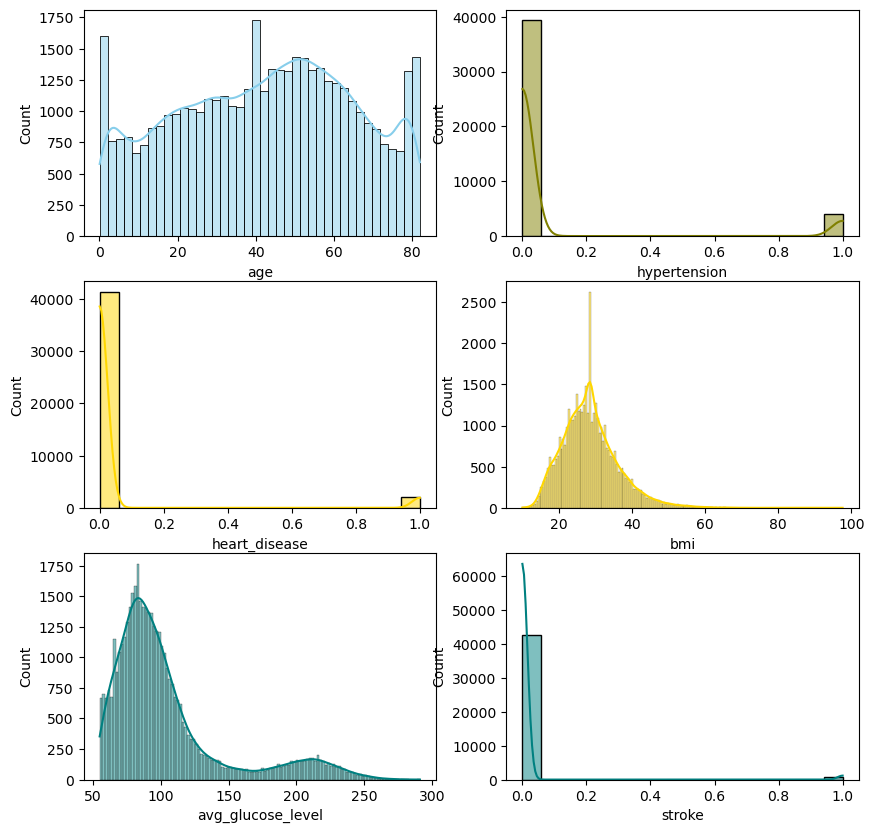

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(data=df, x="age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="hypertension", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="heart_disease", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="bmi", kde=True, color="gold", ax=axs[1, 1])
sns.histplot(data=df, x="avg_glucose_level", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=df, x="stroke", kde=True, color="teal", ax=axs[2, 1])

plt.show()

# fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# sns.histplot(data=df, x="sepal_length", kde=True, color="skyblue", ax=axs[0, 0])
# sns.histplot(data=df, x="sepal_width", kde=True, color="olive", ax=axs[0, 1])
# sns.histplot(data=df, x="petal_length", kde=True, color="gold", ax=axs[1, 0])
# sns.histplot(data=df, x="petal_width", kde=True, color="teal", ax=axs[1, 1])

# plt.show()

- Escrever conclusão sobre distribuição da idade para stroke/ no stroke
- Distribuição das variaveis categóricas
- analise de outliers (ex: avg_glucose_levels)
- Após analise individual, fazer correlação entre variaveis

- Temos uma distribuição praticamente uniforme de idade para todos os casos, tendo AVC ou não
- Iremos explorar as variáveis individualmente para detalhar as distribuições nos casos de ocorrência de AVC

Definimos um dataframe apenas para os casos de ocorrência de AVC

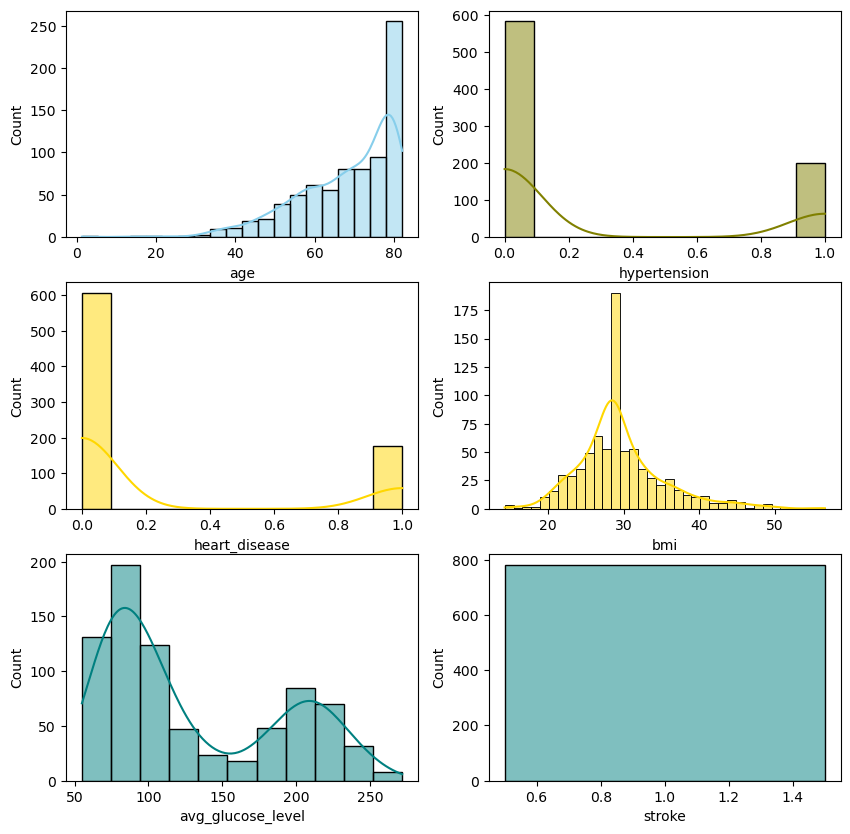

In [11]:
test_strokes_only = df['stroke'] == 1 # teste para os casos de ocorrencia de avc
df_stroke = df[test_strokes_only] #criamos um df apenas para os casos de avc positivo (=1)

# plota os histogramas das colunas não-categóricas nos casos positivos de avc
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(data=df_stroke, x="age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_stroke, x="hypertension", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_stroke, x="heart_disease", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_stroke, x="bmi", kde=True, color="gold", ax=axs[1, 1])
sns.histplot(data=df_stroke, x="avg_glucose_level", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=df_stroke, x="stroke", kde=True, color="teal", ax=axs[2, 1])

plt.show()

In [12]:
df_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.0
mean,68.143448,0.255428,0.226054,129.582669,29.642280,1.0
std,12.316537,0.436380,0.418542,59.734073,5.769294,0.0
min,1.320000,0.000000,0.000000,55.010000,14.300000,1.0
25%,60.000000,0.000000,0.000000,80.990000,26.400000,1.0
50%,71.000000,0.000000,0.000000,104.470000,28.605038,1.0
75%,79.000000,1.000000,0.000000,192.360000,31.900000,1.0
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


- Vimos que a distribuição de idade muda drasticamente com o 1º quartil saindo de 25 anos para 60 anos e a média saindo de 42 para 68 anos. Vimos que a distribuição se torna assimétrica com tendência a população mais velha. Constatamos que os casos de AVC ocorrem com a parcela da população mais velha, corroborando o senso comum.
- Comparamos os casos de hipertensão e doenças cardíacas com os valores da distribuição de todo o dataset

In [13]:
hypertension_total = df['hypertension'].value_counts()
cardiac_disease = df['heart_disease'].value_counts()
card_stroke = df_stroke['heart_disease'].value_counts()
hyper_stroke = df_stroke['hypertension'].value_counts()
print('Casos de doença cardíaca dentro dos casos de AVC: {:.2f}'.format(card_stroke[1]/card_stroke[0]))
print('Casos de doença cardíaca em todo o dataset: {:.2f}'.format(cardiac_disease[1]/cardiac_disease[0]))
print('Casos de hipertensão em todo o dataset: {:.2f}'.format(hypertension_total[1]/hypertension_total[0]))
print('Casos de hipertensão dentro dos casos de AVC: {:.2f}'.format(hyper_stroke[1]/hyper_stroke[0]))

Casos de doença cardíaca dentro dos casos de AVC: 0.29
Casos de doença cardíaca em todo o dataset: 0.05
Casos de hipertensão em todo o dataset: 0.10
Casos de hipertensão dentro dos casos de AVC: 0.34


Os casos de doença cardíaca para o caso geral do dados em comparação com os casos de AVC é 6 vezes maior. De forma similar, os casos de hipertensão são mais de 3 vezes dentro dos casos de ocorrência de AVC em comparação com toda a amostra. Tais colunas se mostram possíveis preditores de um possível AVC.

Iremos agora analisar mais atentamente os valores de IMC (bmi) e Nível de Glicose (avg_glucose_level). Iremos comparar suas distribuições.

[]

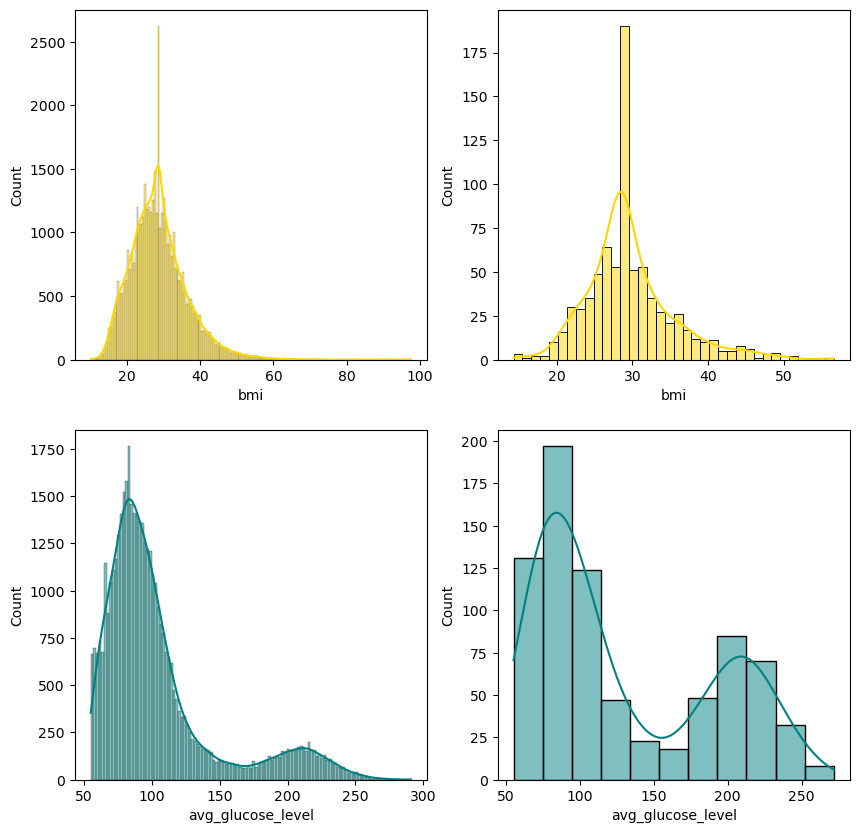

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=df, x="bmi", kde=True, color="gold", ax=axs[0, 0])
sns.histplot(data=df_stroke, x="bmi", kde=True, color="gold", ax=axs[0, 1])
sns.histplot(data=df, x="avg_glucose_level", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df_stroke, x="avg_glucose_level", kde=True, color="teal", ax=axs[1, 1])

plt.plot()

Percebemos que a forma da distribuição não se altera nos dois casos, no entanto a média do bmi parece sofrer uma alteração. Verificamos se este é o caso.

In [15]:
cols = ['bmi', 'avg_glucose_level']

df[cols].describe()

,bmi,avg_glucose_level
count,43400.000000,43400.000000
mean,28.605038,104.482750
std,7.638023,43.111751
min,10.100000,55.000000
25%,23.400000,77.540000
50%,28.100000,91.580000
75%,32.600000,112.070000
max,97.600000,291.050000


In [16]:
df_stroke[cols].describe()

,bmi,avg_glucose_level
count,783.000000,783.000000
mean,29.642280,129.582669
std,5.769294,59.734073
min,14.300000,55.010000
25%,26.400000,80.990000
50%,28.605038,104.470000
75%,31.900000,192.360000
max,56.600000,271.740000


percebemos uma mudança pouco significativa na média e percentis do caso geral para os casos de ocorrência de AVC do índice de massa corporal (<4%), entretanto o nível de glicose aumentou para os casos de AVC em cerca de 25% na média e os quartis acompanharam o aumento. Um caso interessante apontado é que a o valor máximo de ambas as informações no caso de ocorrência são menores que os valores máximos, valendo uma análise dos outliers destas características.

count    196.000000
mean     218.238878
std       16.861850
min      192.460000
25%      205.345000
50%      214.995000
75%      229.537500
max      271.740000
Name: avg_glucose_level, dtype: float64

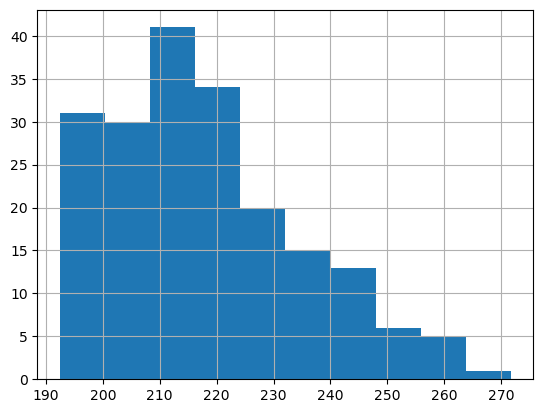

In [17]:
# Histograma de área construída dropando valores abaixo do percentil 99

# building_base = base.dropna(subset=["BuildingArea"])
glucose_stroke_99p = df_stroke['avg_glucose_level'] > np.percentile(df_stroke['avg_glucose_level'] , 75)
glucose_99p = df['avg_glucose_level'] > np.percentile(df['avg_glucose_level'] , 75)

df_stroke[glucose_stroke_99p].avg_glucose_level.hist()
df_stroke[glucose_stroke_99p].avg_glucose_level.describe()

A média do terceiro percentil da distribuição de nível de glucose é cerca de 70% maior que a média dos casos de ocorrência de AVC. Verificamos o histograma das informações para o percentil acima.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

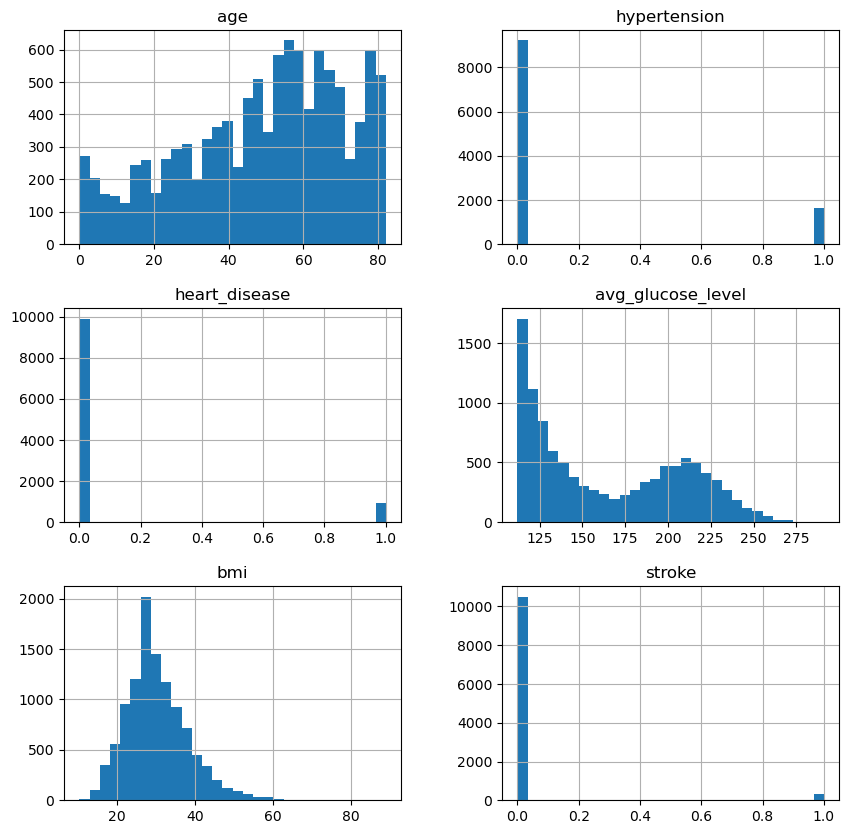

In [18]:
df[glucose_99p].hist(bins=30, figsize=(10,10))

Vimos que as distribuições não mudam de forma drástica para o percentil indicado. Verificamos para o IMC.

count    195.000000
mean      37.407692
std        4.864790
min       32.000000
25%       33.650000
50%       36.200000
75%       39.600000
max       56.600000
Name: bmi, dtype: float64

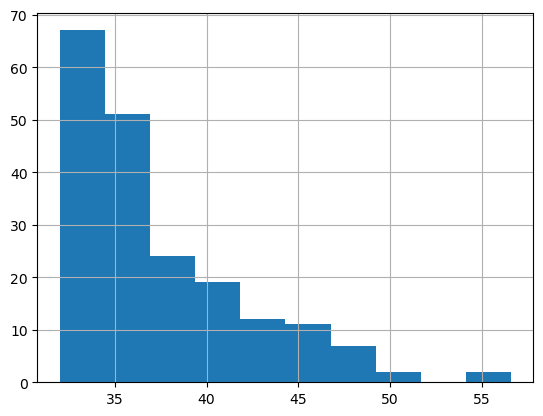

In [19]:
# Histograma de área construída dropando valores abaixo do percentil 75

# building_base = base.dropna(subset=["BuildingArea"])
bmi_stroke_99p = df_stroke['bmi'] > np.percentile(df_stroke['bmi'] , 75)
bmi_99p = df['avg_glucose_level'] > np.percentile(df['avg_glucose_level'] , 75)

df_stroke[bmi_stroke_99p].bmi.hist()
df_stroke[bmi_stroke_99p].bmi.describe()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

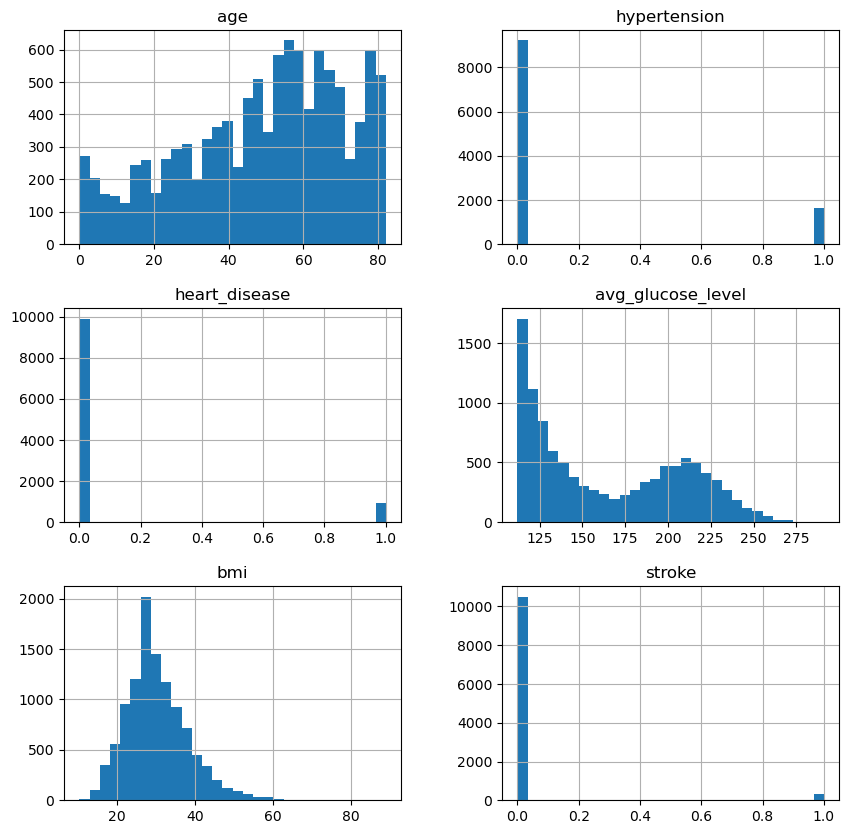

In [20]:
df[bmi_99p].describe()
df[bmi_99p].hist(bins=30, figsize=(10,10))

Iremos analisar agora as variáveis categóricas, listamos as colunas que ainda não analisamos

[]

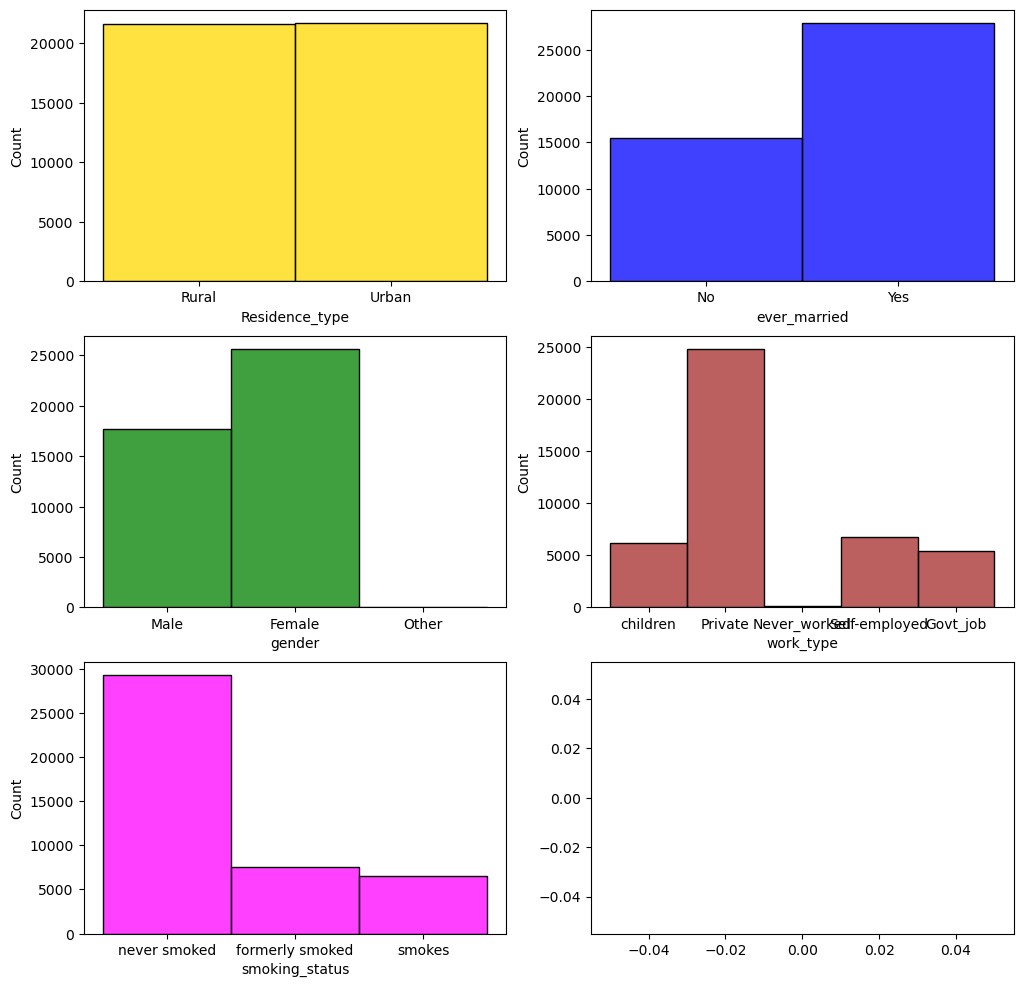

In [21]:
df.columns
cols_categorical = ['Residence_type','ever_married','gender','work_type','smoking_status']

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

sns.histplot(data=df, x=cols_categorical[0], kde=False, color="gold", ax=axs[0,0])
sns.histplot(data=df, x=cols_categorical[1], kde=False, color="blue", ax=axs[0,1])
sns.histplot(data=df, x=cols_categorical[2], kde=False, color="green", ax=axs[1,0])
sns.histplot(data=df, x=cols_categorical[3], kde=False, color="brown", ax=axs[1,1])
sns.histplot(data=df, x=cols_categorical[4], kde=False, color="magenta", ax=axs[2,0])


plt.plot()
# df[cols_categorical[0]].hist(bins=3)

Das variáveis categóricas:

- Maioria nunca fumou
- A maioria trabalha na iniciativa privada
- Mais mulheres que outros gêneros (existe 1 outro gênero não especificado no dataset)
- Maioria foi ou é casada/casado
- A quantidade de pessoas que moram na zona rural e urbana tem proporção igual

Iremos analisar as váriaveis categóricas no caso de ocorrência de AVC. Repetimos, então, os histogramas acima para este caso.

[]

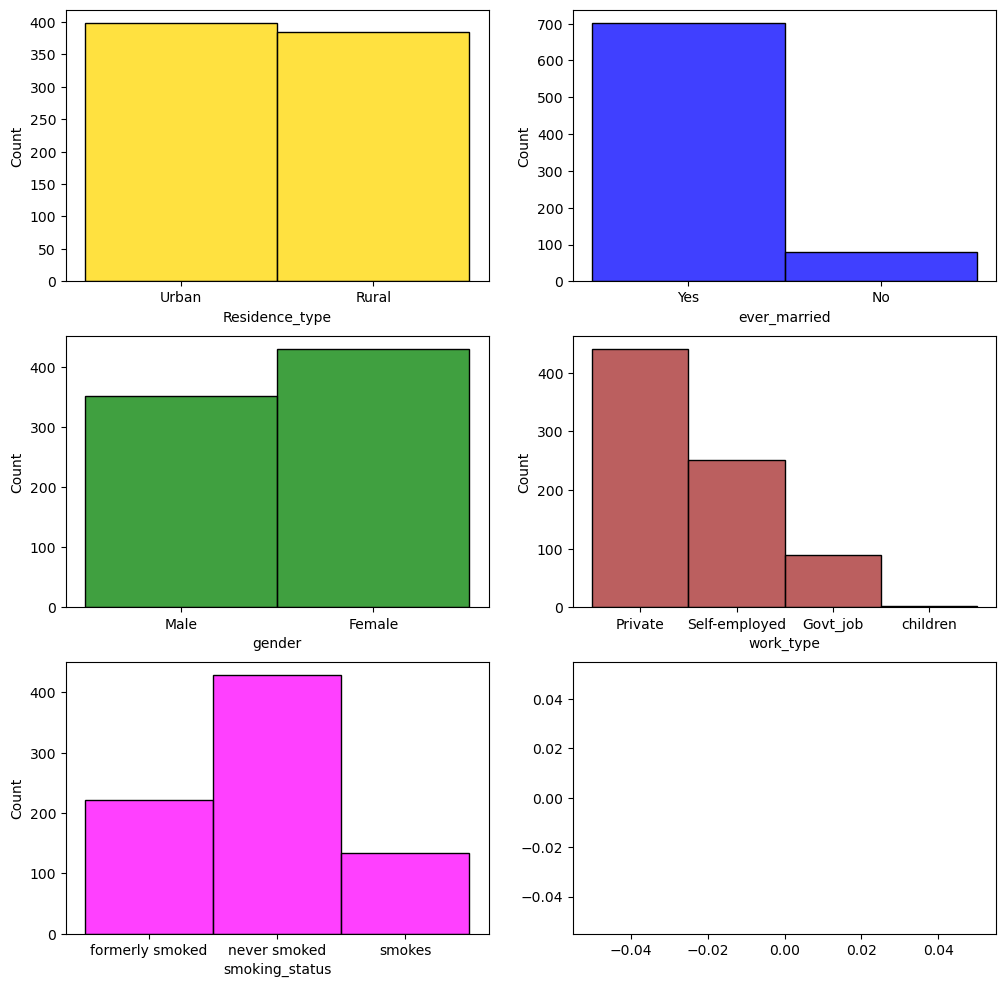

In [22]:
cols_categorical = ['Residence_type','ever_married','gender','work_type','smoking_status']

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

sns.histplot(data=df_stroke, x=cols_categorical[0], kde=False, color="gold", ax=axs[0,0])
sns.histplot(data=df_stroke, x=cols_categorical[1], kde=False, color="blue", ax=axs[0,1])
sns.histplot(data=df_stroke, x=cols_categorical[2], kde=False, color="green", ax=axs[1,0])
sns.histplot(data=df_stroke, x=cols_categorical[3], kde=False, color="brown", ax=axs[1,1])
sns.histplot(data=df_stroke, x=cols_categorical[4], kde=False, color="magenta", ax=axs[2,0])


plt.plot()

Dentre as pessoas que sofreram um AVC:
- A proporção dos que foram/estão casados em relação aos que nunca foram é bem maior que a amostra
- A liderança em casos continua sendo de mulheres, que trabalham na inicitiva privada, nunca fumaram, moram em região urbana e já foram/ estão casadas.

Investigaremos o caso de como estas váriaveis se correlacionam.